(CONFIDENTIAL) INTERNAL USE ONLY, NOT FOR EXTERNAL DISTRIBUTION

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [59]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Clustering

In [60]:
import sklearn as sk
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

In [61]:
from sklearn import datasets
from sklearn import cluster

In [68]:
def show_clusters(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

## Kmeans

In [165]:
from sklearn.cluster import KMeans

In [12]:
# cluster.KMeans?

In [147]:
X, _ = datasets.make_blobs(
    n_samples=1500,
    n_features=4,
    centers=5,
    cluster_std=0.4,
    random_state=2020
)

In [148]:
kmeans = cluster.KMeans(n_clusters=5, max_iter=100000, tol=1e-6, n_init=1)

In [149]:
%%time
# ypred = kmeans.fit_predict
_ = kmeans.fit(X)

CPU times: user 7.66 ms, sys: 1.31 ms, total: 8.97 ms
Wall time: 8.26 ms


In [150]:
ypred = kmeans.predict(X)

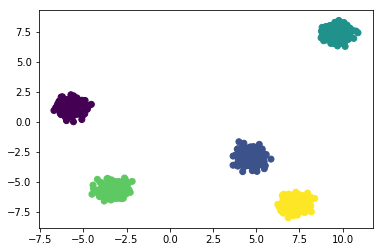

In [151]:
show_clusters(X, ypred)

In [96]:
np.unique(ypred)

array([0, 1, 2], dtype=int32)

In [130]:
ypred.shape

(1500,)

In [97]:
X.shape

(1500, 4)

In [131]:
clusters = {_y: [] for _y in np.unique(ypred)}
clusters

{0: [], 1: [], 2: []}

In [132]:
for idx, (_x, _y) in enumerate(zip(X, ypred)):
    clusters[_y].append(idx)

In [135]:
for _y, _cluster in clusters.items():
    print("{}: {}".format(_y, len(_cluster)))

0: 500
1: 500
2: 500


In [137]:
kmeans.inertia_

941.4337054978103

### Kmeans is sensitive to the number of centroids: How to find the best K?

In [62]:
# Elbow method

In [152]:
ks = range(1, 11) # 1-10 
costs = []
for k in ks:
    _kmeans = cluster.KMeans(n_clusters=k)
    _kmeans.fit(X)
    cost = _kmeans.inertia_
    costs.append(cost)
    print("k={}, cost={}".format(k, cost))

k=1, cost=131611.767049
k=2, cost=69383.172863
k=3, cost=16624.826652
k=4, cost=7198.66217309
k=5, cost=941.088841699
k=6, cost=904.764126459
k=7, cost=865.899718697
k=8, cost=830.63554945
k=9, cost=798.233852585
k=10, cost=767.836751292


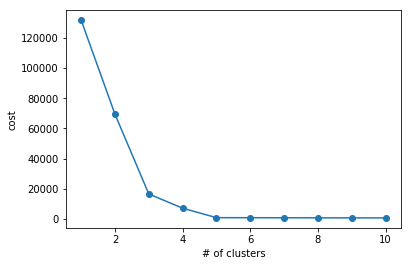

In [153]:
plt.plot(ks, costs, '-o')
plt.xlabel("# of clusters")
plt.ylabel("cost")
plt.show()

### Kmeans 对数据分布的敏感度

#### Anisotropic

In [154]:
T = np.array([[0.6, -0.636], [-0.40, 0.85]])

In [169]:
X1, y1 = datasets.make_blobs(
    n_samples=1500,
    n_features=2,
    centers=3,
    cluster_std=0.4,
    random_state=2020
)

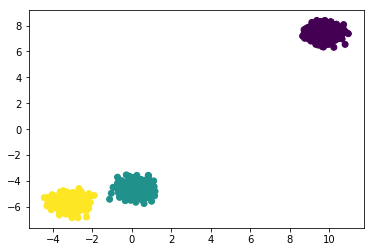

In [170]:
show_clusters(X1, y1)

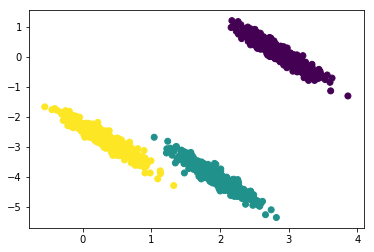

In [171]:
Xani = X1.dot(T)
yani = y1
show_clusters(Xani, yani)

In [166]:
kmeans_ani = KMeans(n_clusters=3)

In [167]:
kmeans_ani.fit(Xani)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

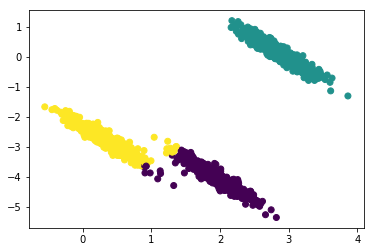

In [172]:
ypred_ani = kmeans_ani.predict(Xani)
show_clusters(Xani, ypred_ani)

#### Circle

In [182]:
Xcircle, ycircle = datasets.make_circles(n_samples=1500, factor=0.5, random_state=2020, noise=0.05)

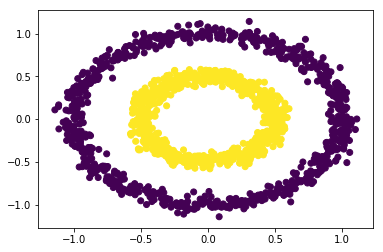

In [183]:
show_clusters(Xcircle, ycircle)

In [184]:
kmeans_circle = KMeans(n_clusters=2)

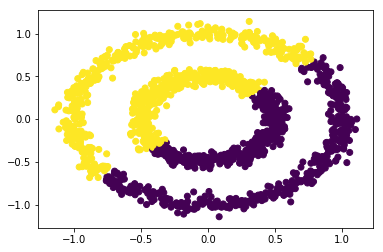

In [185]:
ypred_circle = kmeans_circle.fit_predict(Xcircle)
show_clusters(Xcircle, ypred_circle)

## DBSCAN

In [191]:
from sklearn.cluster import DBSCAN

In [170]:
# outlier detection

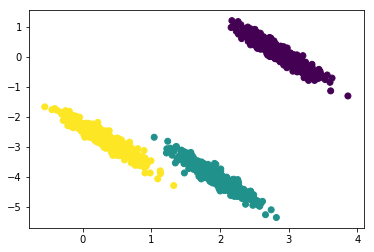

In [190]:
Xani = X1.dot(T)
yani = y1
show_clusters(Xani, yani)

In [230]:
dbscan = DBSCAN(eps=0.2, min_samples=5)

In [228]:
ypred_db = dbscan.fit_predict(Xani)

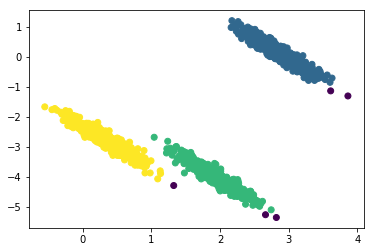

In [229]:
show_clusters(Xani, ypred_db)

In [205]:
nbrs = sk.neighbors.NearestNeighbors(n_neighbors=10)

In [206]:
nbrs.fit(Xani)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [207]:
distances, _ = nbrs.kneighbors(Xani)

In [208]:
distances.shape

(1500, 10)

In [209]:
distances[0]

array([0.        , 0.01121032, 0.01644614, 0.02309857, 0.02859726,
       0.0298184 , 0.0396146 , 0.04084954, 0.0451498 , 0.04567041])

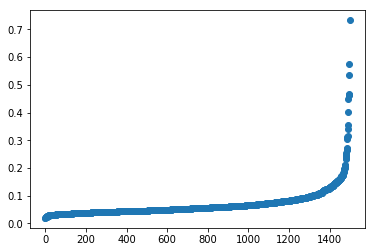

In [211]:
kdists = np.sort(distances[:, -1])
plt.plot(kdists, 'o')

### Circle data

In [231]:
dbscan_circle = DBSCAN(eps=0.2, min_samples=5)

In [232]:
ypred_circle_db = dbscan_circle.fit_predict(Xcircle)

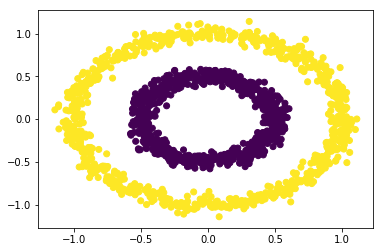

In [233]:
show_clusters(Xcircle, ypred_circle_db)

## Agglomerative clustering

## Gaussian Mixure

In [135]:
from sklearn import mixture

# Outlier detection



In [234]:
import gensim
from sklearn.cluster import DBSCAN

In [1]:
word2vec_fname = 'utils/GoogleNews-vectors-negative300-SLIM.bin.gz'

In [4]:
%time model = gensim.models.KeyedVectors.load_word2vec_format(fname=word2vec_fname, binary=True)

CPU times: user 21.3 s, sys: 610 ms, total: 21.9 s
Wall time: 22.5 s


In [7]:
def infer_embeddings(words):
    return [model[w] for w in words]

In [237]:
words = ["he", "she", "banana", "apple", "watermelon", "soccer", "football", "basketball", "data"]

In [251]:
embeddings = np.asarray(infer_embeddings(words))

In [252]:
embeddings.shape

(9, 300)

In [242]:
model.similarity("he", "she")

0.6129949174056142

### DBSCAN outlier detection

In [248]:
# sk.metrics.pairwise_distances: ['cityblock', 'cosine', 'euclidean', 'l1', 'l2',  'manhattan']

In [265]:
dbscan_word2vec = DBSCAN(eps=0.5, min_samples=2, metric="cosine")

In [269]:
labels = dbscan_word2vec.fit_predict(embeddings)

In [270]:
labels

array([ 0,  0,  1,  1,  1,  2,  2,  2, -1])

In [271]:
clusters = {}
outliers = []

for word, lab in zip(words, labels):
    if lab == -1:
        outliers.append(word)
    else:
        if lab not in clusters:
            clusters[lab] = []
        clusters[lab].append(word)

In [273]:
clusters

{0: ['he', 'she'],
 1: ['banana', 'apple', 'watermelon'],
 2: ['soccer', 'football', 'basketball']}

In [274]:
outliers

['data']